# Decision Tree for Regression

In this notebook we study the Decision Tree algorithm for regression problems. As in the other notebook, we will introduce the model from a theoretical point of view and then we apply it to a concrete example in a mini-challenge. The notebook is structured as followed:

- [Theoretical Analysis:](#s1)
    - [Algorithm](#s1.1)
    - [Advantages and Limitations](#s1.2)
    
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'>Theoretical Analysis</a> 

Decision Tree learning is one of the predictive modeling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item to conclusions about the item's target value. Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values are called regression trees. 

Tree-based methods partition the feature space into a set of rectangles, and then fit a simple model in each one. They are conceptually simple yet powerful. 

Let’s consider a regression problem with continuous response $Y$ and inputs $X_1$ and $X_2$. To simplify matters, we restrict attention to recursive binary partitions like the one in the picture below


<div>
<img width=300 src='images/tree3.png' /> 
</div>



We first split the space into two regions, and model the response by the mean of $Y$ in each region. We choose the variable and split-point to achieve the best fit. Then one or both of these regions are split into two more regions, and this process is continued, until some stopping rule is applied. For example, in the picture, we first split at $X_1=t_1$. Then the region $X_1\le t_1$ is split at $X_2=t_2$ and the region $X_1>t_1$ is split at $X_1=t_3$. Finally, the region $X_1>t_3$ is split at $X_2=t_4$. The result of this process is a partition into five regions $R_1, \cdots, R_5$. The corresponding regression model predicts $Y$ with a constant $c_m$ in the region $R_m$, that is

\begin{align*}
\hat{f}(X)=\sum_{m=1}^5c_mI\left\{\left(X_1,X_2\right)\in R_m\right\}
\end{align*}

where $I(x)$ is the index function that takes values 0 or 1 depending if the condition in the argumenti is satisfied or not. This same model can be represented by the binary tree or by the 3d function in the picture below

<div>
<img width=500 src='images/tree4.png' /> 
</div>

The full dataset sits at the top of the tree in what we call __root node__. Observations satisfying the condition at each __decision node__ are assigned to the left __branch__ (or subtree), and the others to the right one. The __terminal nodes__ or __leaves__ of the tree correspond to the regions $R_1, \cdots, R_5$. The main parts of a decision tree can be summarized in the following picture 



<div>
<img width=500 src='images/tree2.png' /> 
</div>


So far we discussed the general setup of the decision and the next step will be to analyze first of all is the tree is for regression or classification purpose and then to focus on the algorithm that the tree uses. There are many specific decision-tree algorithms. Notable ones include:

- ID3 (Iterative Dichotomiser 3)
- C4.5 (successor of ID3)
- CART (Classification And Regression Tree)
- Chi-square automatic interaction detection (CHAID)
- MARS: extends decision trees to handle numerical data better.
- Conditional Inference Trees. Statistics-based approach that uses non-parametric tests as splitting criteria, corrected for multiple testing to avoid overfitting. 

In this work we focus on decision tree for regression and in particular on the algorithm CART

###  <a class="anchor" id='s1.1'>Algorithm</a> 

Classification and regression trees (CART) are a non-parametric decision tree learning technique that produces either classification or regression trees, depending on whether the dependent variable is categorical or numeric, respectively. Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. Different algorithms use different metrics for measuring "best". These generally define a __criterion__.
We are going to describe the CART algorithm for regression using the squared error as metric. 

Our dataset consist of $p$ inputs and a reponse, for each of $N$ observations: that is, $(x_i,y_i)$ for $i=1,\cdots, N$, with $x_i=\left(x_{i1},\cdots x_{ip}\right)$. The algorithm needs to automatically decide on the splitting variable and split points, and also what shape the tree should have. Suppose first that we have a partition into $M$ regions $R_1,\cdots R_M$, and we model the reponse as a constant $c_m$ in ech region

\begin{align*}
f(x)=\sum_{m=1}^Mc_mI(x\in R_m)
\end{align*}

If we adopt as our __criterion__ minimization of the sum of squares $\sum(y_i-f(x_i))^2$, it is easy to see that the best $\hat{c}_m$ is just the estimator of expected value (the average) of $y_i$ in the region $R_m$

\begin{align*}
\hat{c}_m=\text{ave}(y_i|x_i\in R_m)
\end{align*}


Now finding the best binary partition in terms of minimum sum of squares is generally infeasible. Hence we proceed with a __greedy algorithm__. Starting with all of the data, consider a splitting variable $j$ and split point $s$, and define the pair of half-planes

\begin{align*}
R_1(j,s))\{X|X_j\le s\}\quad \text{and}\quad R_2(j,s))\{X|X_j> s\}
\end{align*}

Then we seek the splitting variable $j$ and split point $s$ that solve

\begin{align*}
\min_{j,s}\left[\min_{c_1}\sum_{x_i\in R_1(j,s)}(y_i-c_1)^2+\min_{c_2}\sum_{x_i\in R_2(j,s)}(y_i-c_2)^2\right]
\end{align*}

For any choice $j$ and $s$, the inner minimization is solved by

\begin{align*}
\hat{c}_1=\text{ave}(y_i|x_i\in R_1(j,s))\quad \text{and}\quad \hat{c}_2=\text{ave}(y_i|x_i\in R_2(j,s))
\end{align*}

For each splitting variable, the determination of split point $s$ can be done very quickly and hence by scanning through all of the inputs, determination of the best pair $(j,s)$ is feasible. Having found the best split, we partition the data into the two resulting regions and repeat the splitting process on each of the two regions. Then this process is repeated on all of the resulting regions. 


One of the questions that arises in a decision tree algorithm is the optimal size of the final tree. A tree that is too large risks overfitting the training data and poorly generalizing to new samples. A small tree might not capture important structural information about the sample space. However, it is hard to tell when a tree algorithm should stop because it is impossible to tell if the addition of a single extra node will dramatically decrease error. This problem is known as the __horizon effect__.

There is in general two ways to set constraints on tree size: __Setting Constraints on Tree Size__  and __Pruning__.

1. __Setting Constraints on Tree Size__: 

    This can be done by using various parameters which are used to define a tree. The parameters used for defining a tree are: 
    
 - Minimum samples for a node split (it should be tuned using CV)
 - Minimum samples for a terminal node
 - Maximum depth of tree (it should be tuned using CV)
 - Maximum number of terminal nodes
 - Maximum features to consider for split



2. __Tree Pruning__: 

    This strategy is to grow the tree until each node contains a small number of instances then use pruning to remove nodes that do not provide additional information. We are going to show the pruning in details. Pruning should reduce the size of a learning tree without reducing predictive accuracy as measured by a cross-validation set. There are many techniques for tree pruning that differ in the measurement that is used to optimize performance:
    

- __Reduced error pruning__: 
   
     One of the simplest forms of pruning is reduced error pruning. Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. While somewhat naive, reduced error pruning has the advantage of simplicity and speed.
    

- __Cost complexity pruning__: 

     We grow a large tree $T_0$ stopping the splitting process nly when some minimum node size (say 5) is reached. Then this tree is pruned as follows. We define a subtree $T\subset T_0$ to be any tree that can be obtained by pruning $T_0$, that is, collapsing any number of its internal nodes. We index terminal nodes by $m$ representing region $R_m$. Let $|T|$ denote the number of terminal nodes in $T$. Letting
     

\begin{align*}
N_m&=\#\{x_\in R_m\}\\
\hat{c}_m&=\frac{1}{N_m}\sum_{x_i\in R_m}y_i\\
Q_m(T)&=\frac{1}{N_m}\sum_{x_i\in R_m}(y_i-\hat{c}_m)^2
\end{align*}
  
we define the cost complexity criterion


\begin{align*}
C_{\alpha}(T)= \sum_{m=1}^{|T|}N_mQ_m(T) +\alpha|T|
\end{align*}

The idea is to find, for each $\alpha$, the subtree $T_{\alpha}\subset T_0$ to minimize $C_{\alpha}(T)$. The tuning   parameter $\alpha\ge 0$ governs the tradeoff between tree size and its goodness of fit to the data. Large values of $\alpha$ result in smaller trees $T_{\alpha}$, and conversely for smaller values of $\alpha$. As the notation suggests, with $\alpha=0$ the solution is the full tree $T_0$. We discuss how to adaptively choose $\alpha$ below. For each $\alpha$ one can show that there is a unique smallest subtree $T_{\alpha}$ that minimizes $C_{\alpha}(T)$. To find $T_{\alpha}$ we use weakest link pruning: we successively collapse the internal node that produces the smallest per-node increase in $\sum_mN_mQ_m(T)$, and continue until we produce the single-node (root) tree. This gives a (finite) sequence of subtrees, and one can show this sequence must contain $T_{\alpha}$. Estimation of $\alpha$ is achieved by five or ten fold cross-validation: we choose the value $\hat{\alpha}$ to minimize the cross-validated sum of squares. Our final tree is $T_{\alpha}$.

###  <a class="anchor" id='s1.2'>Advantages and Limitations</a> 

Amongst other data mining methods, decision trees have various advantages:

- It can be used for both Classification and Regression problems: People are able to understand decision tree models after a brief explanation. Trees can also be displayed graphically in a way that is easy for non-experts to interpret.


- Easy to Understand, Interpret, Visualise


- Useful in Data exploration: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables.


- Less data preparation required: It is not influenced by outliers and missing values to a fair degree.


- Data type is not a constraint: It can handle both numerical and categorical variables


- Can capture Nonlinear relationships

Amongst the limitation we have

- Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning.


- Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.


- Cannot extrapolate


- Decision trees can be unstable: Small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.


- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristics such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. To reduce the greedy effect of local optimality, some methods such as the dual information distance (DID) tree were proposed.


##  <a class="anchor" id='s2'>Implementation in Python</a> 

The class `DecisionTreeRegressor` of the module `sklearn.tree` is:

`sklearn.tree.DecisionTreeRegressor`

Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://scikit-learn.org/stable/modules/tree.html)

##  <a class="anchor" id='s3'>Mini-challenge</a> 

We still study in this mini challenge the dasaset of the pricing house of Boston. We will use the Decision Tree for regression and we will try to optimize the hyperparameters of the model in order to get a hig accuracy that we will compare with the linear models. As in the previous case we structure the section as follows:

- __Inizialization__
- __Exploration of Data__
- __Model Selection__
- __Model Assessment__
- __Interpretability__

### Inizialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, info_plots, get_dataset
from sklearn.utils.random import sample_without_replacement


from sklearn import tree
import graphviz 

from itertools import product

import warnings
warnings.filterwarnings("ignore")

### Exploration of Data

In [2]:
df=pd.read_csv('data/dataset_paris.csv')

In [3]:
df.shape

(18791, 24)

In [4]:
df.head()

,bathrooms,bedrooms,beds,is_fully_refundable,is_host_highly_rated,is_new_listing,latitude,longitude,person_capacity,weekly_factor,...,Kitchen,Breakfast,Essentials,available,local_price,min_nights,week_number,entire_home,private_room,shared_room
0,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,35,0,1,0
1,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,1.000000,47.000000,1.0,36,0,1,0
2,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.857143,47.000000,1.0,37,0,1,0
3,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.142857,43.571429,1.0,38,0,1,0
4,2.0,1.0,1.0,1,0,1,48.869292,2.348335,1,1.0,...,1,0,1,0.000000,43.571429,1.0,39,0,1,0


### Model Selection

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('local_price',axis=1), df.local_price, test_size=0.2, random_state=10)

In [7]:
model=DecisionTreeRegressor(max_depth=20)
model.fit(X_train,y_train)

r2_score(y_test, model.predict(X_test))

0.9259892791684884

In [59]:
X = df[['bedrooms']].values                        
y = df['local_price'].values                          

sort_idx = X.flatten().argsort()
X = X[sort_idx]
y = y[sort_idx]

model = DecisionTreeRegressor(max_depth=6)         
model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

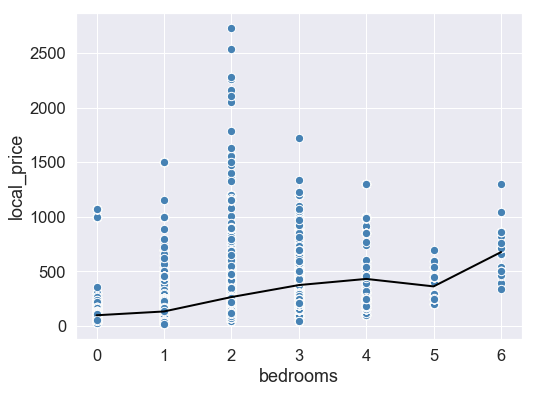

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='steelblue',        
            edgecolor='white', s=70)
plt.plot(X, model.predict(X),           
         color='black', lw=2)
plt.xlabel('bedrooms')
plt.ylabel('local_price')
plt.show()


In [83]:
grid_params = {
    'max_depth': np.arange(2,102,10),
    'min_samples_split': np.arange(2,10,1)
}

cv_result = {
    'test_score': [],
    'parameters': []
}

for params in product(*grid_params.values()):
    
    reg = DecisionTreeRegressor(max_depth=params[0], min_samples_split=params[1])
    reg.fit(X_train, y_train)
    test_score = r2_score(y_test, reg.predict(X_test))
    
    cv_result['test_score'].append(test_score)
    cv_result['parameters'].append(params)

In [84]:
def plot_grid_results(cv):
    score_matrix = np.asarray(cv["test_score"]).reshape((len(grid_params['max_depth']),len(grid_params['min_samples_split'])))

    plt.figure(figsize=(22, 10))
    plt.title("Scores R2")
    sns.set(font_scale=1.5)
    annotations = np.array([[str("{:2.1f}".format(x * 100))
                              for x in row ] for row in score_matrix])
    ax = sns.heatmap(score_matrix, annot=annotations, fmt="",
               yticklabels=grid_params["max_depth"],
               xticklabels=grid_params["min_samples_split"],annot_kws={"size":3*len(grid_params['min_samples_split'])})
    ax.set(ylabel="max_depth", xlabel="min_samples_split")

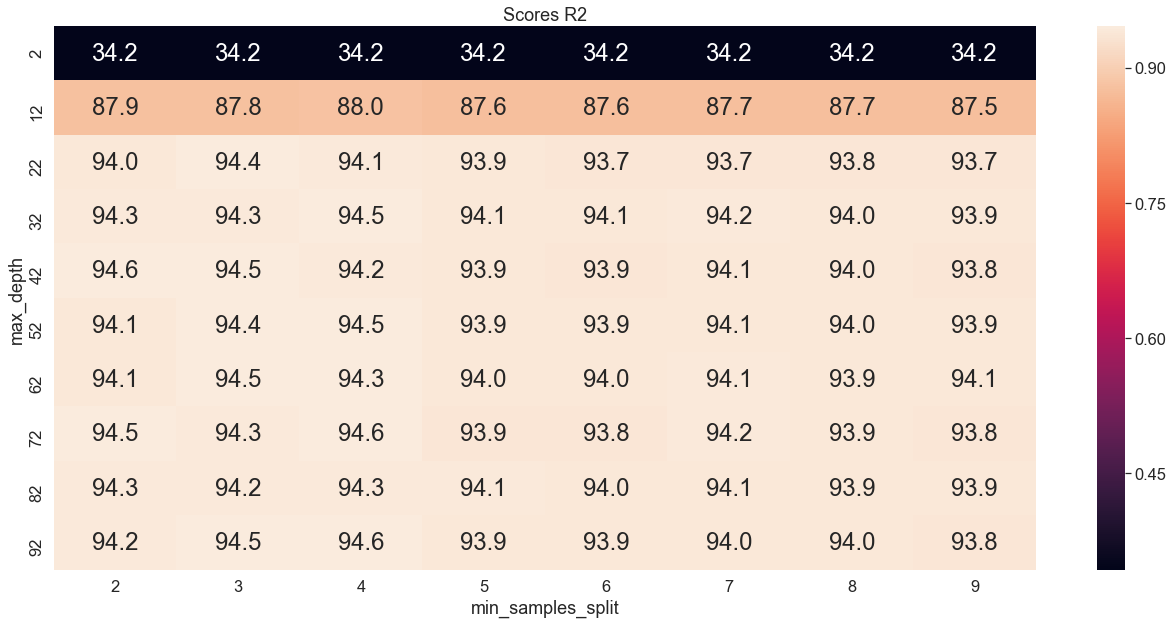

In [85]:
plot_grid_results(cv_result)

In [80]:
kf= KFold(n_splits=5, shuffle=True)
grid_params = {
    'max_depth': np.arange(2,50,2),
    'min_samples_split': np.arange(2,10,1),
}
model = DecisionTreeRegressor()
clf = GridSearchCV(model, param_grid=grid_params, n_jobs=-1, cv=kf, refit=True)
clf.fit(df.drop('local_price',axis=1), df.local_price)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]), 'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
clf.best_params_

{'max_depth': 42, 'min_samples_split': 4}

In [82]:
clf.best_score_

0.956676648156542

In [86]:
model=clf.best_estimator_

In [87]:
model

DecisionTreeRegressor(criterion='mse', max_depth=42, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Model Assessment

In [93]:
def r2(rep):
    rkf= RepeatedKFold(n_splits=5, n_repeats=rep, random_state=True)
    r2=[]
    
    for train_I, test_I in rkf.split(df):
        X_fold_train = df.iloc[train_I, :].drop('local_price',axis=1)
        y_fold_train = df['local_price'].values[train_I]
        X_fold_test = df.iloc[test_I, :].drop('local_price',axis=1)
        y_fold_test = df['local_price'].values[test_I]
        model = clf.best_estimator_
        model.fit(X_fold_train, y_fold_train)
        r2.append(r2_score(y_fold_test, model.predict(X_fold_test)))
    print('The estimation of the r2 score over the test distributions is:', "{:2.2f}%".format(np.mean(r2)*100), '$\u00B1 $', np.std(r2))
    print("The confidence interval is [{:2.1f}%, {:2.1f}%]".format(*np.quantile(r2, q=[0.025, 0.975]) * 100))
    
    return r2

The estimation of the r2 score over the test distributions is: 94.58% $± $ 0.012435094010785052
The confidence interval is [92.0%, 96.5%]


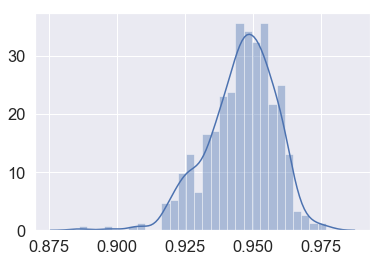

In [95]:
sns.distplot(r2(100),bins=30)

### Intepretability

In [98]:
model=DecisionTreeRegressor(max_depth=10, min_samples_split=4)
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [116]:
import pydotplus

dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("tree")

'tree.pdf'

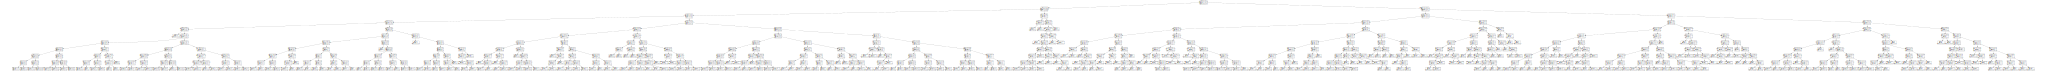

In [117]:
graph

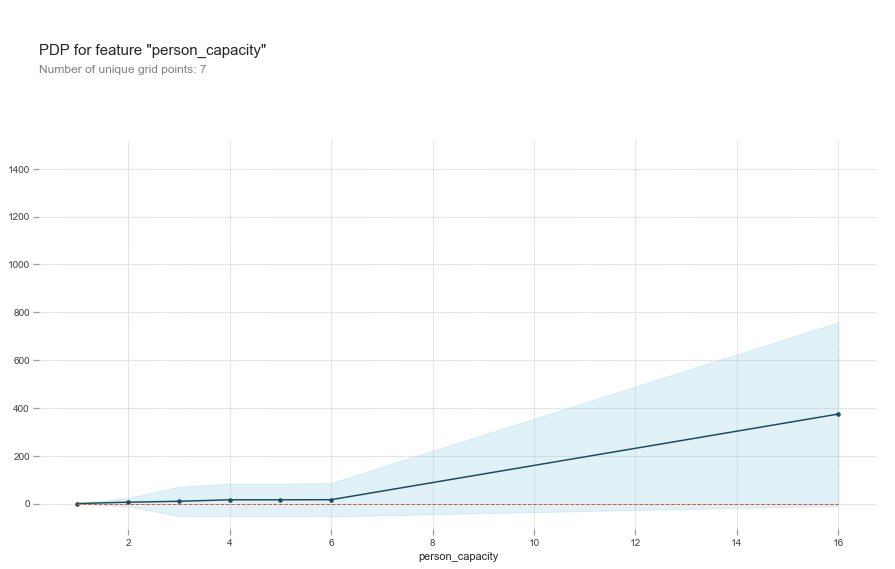

In [123]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='person_capacity')


pdp.pdp_plot(pdp_goals, 'person_capacity')
plt.show()

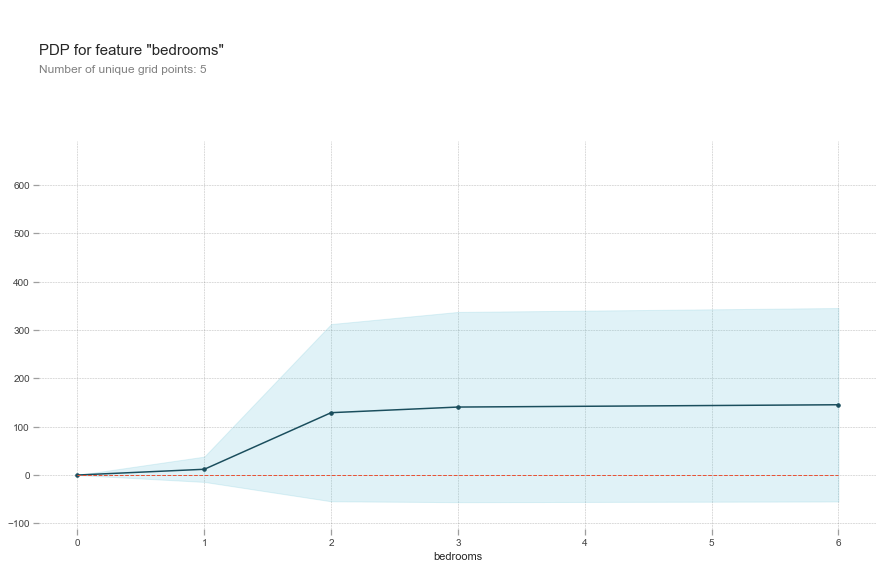

In [129]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='bedrooms')


pdp.pdp_plot(pdp_goals, 'bedrooms')
plt.show()

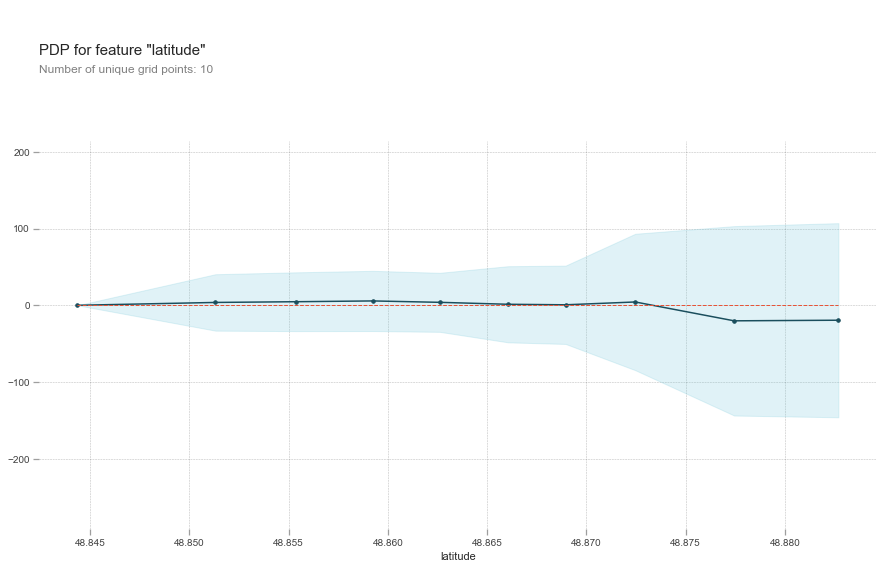

In [127]:
pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=X_test.columns, feature='latitude')


pdp.pdp_plot(pdp_goals, 'latitude')
plt.show()